## Unsupervised Nearest Neighbors

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


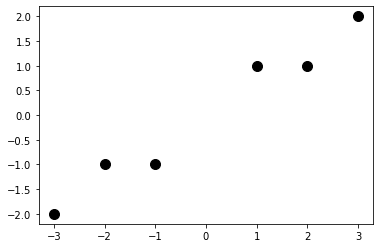

In [1]:
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X) 
# algorithm = "https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms"
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)
plt.scatter(X[:, 0], X[:, 1], c='black', s=100);

## KMeans Clustering

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

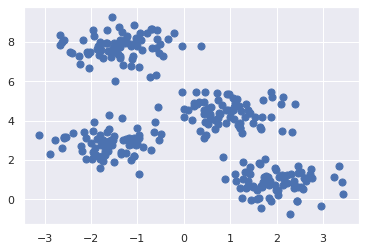

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

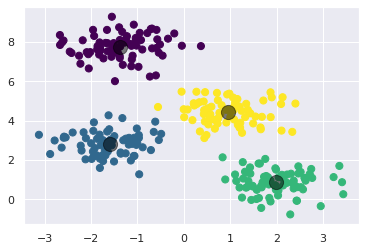

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Gaussian Mixture Clustering

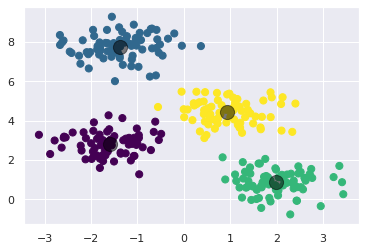

In [6]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4)
gm.fit(X)
prediction = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='black', s=200, alpha=0.5);

## Implement Clustering Metrics Functions

In [7]:
from sklearn.metrics import pairwise_distances #Hint: pd =

def correctness(y_test, y_pred, i, j):
    assert()
    if y_test[i] == y_test[j] and y_pred[i] == y_pred[j]:
        return 1
    else:
        return 0
    
def precision_bcubed(y_test, y_pred):
    assert(len(y_test) == len(y_pred)), 'length of test and prediction must be the same'
    n = len(y_test)
    s = 0
    for i in range(len(y_test)):
        s += np.sum(y_test[i]==y_pred[i])/len(np.array(y_pred[i]).ravel())
    return s / n

def recall_bcubed(y_test, y_pred):
    assert(len(y_test) == len(y_pred)), 'length of test and prediction must be the same'
    n = len(y_test)
    s = 0
    for i in range(len(y_test)):
        s += np.sum(y_test[i]==y_pred[i])/len(np.array(y_test[i]).ravel())
    return s / n

def f1_bcubed(y_test, y_pred):
    assert(len(y_test) == len(y_pred)), 'length of test and prediction must be the same'
    prec = precision_bcubed(y_test, y_pred)
    rec = recall_bcubed(y_test, y_pred)
    f1 = (2*prec*rec)/(prec+rec)
    return f1

def silhouette(X, label):
    X = np.array(X)
    assert(len(X) == len(label)), 'data and label must have same length'
    c = np.unique(label)
    score = []
    for i in c:
        clust = X[label==i]
        intra = pairwise_distances(clust).mean()
        inter = pairwise_distances(clust, X).mean()
        score.append((inter - intra) / max(inter, intra))   
    return np.array(score).mean()

In [8]:
silhouette(X, prediction)

0.7140067353919193

In [9]:
import numpy as np
y_test, y_pred = np.array([0, 0, 0, 1, 1, 1]), np.array([0, 0, 1, 1, 2, 2])

precision = precision_bcubed(y_test=y_test, y_pred=y_pred)
print('precision:', precision)

recall = recall_bcubed(y_test=y_test, y_pred=y_pred)
print('recall:', recall)

f1 = f1_bcubed(y_test=y_test, y_pred=y_pred)
print('f1:', f1)

precision: 0.5
recall: 0.5
f1: 0.5


## Experimenting

In [10]:
from sklearn.datasets import make_blobs, make_moons, make_circles
# from sklearn.preprocessing import StandardScaler

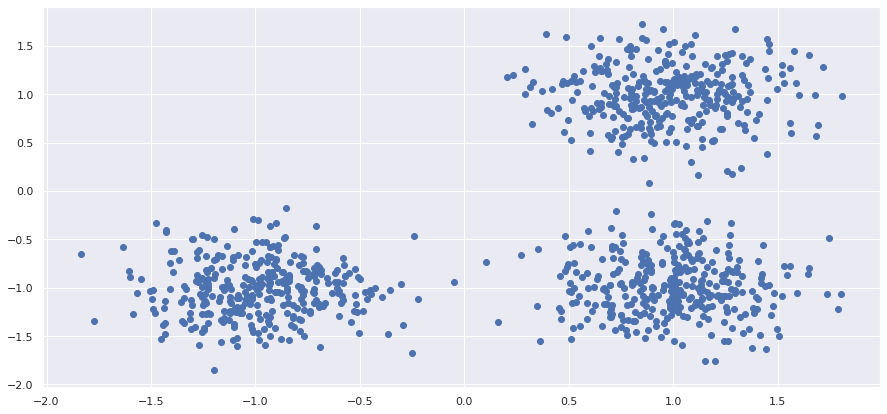

In [11]:
from matplotlib import pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=centers, cluster_std=0.3,
                            random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show();

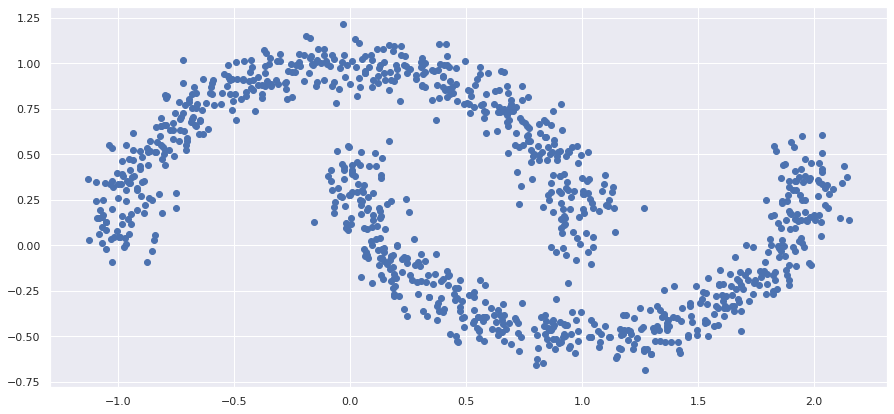

In [12]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show();

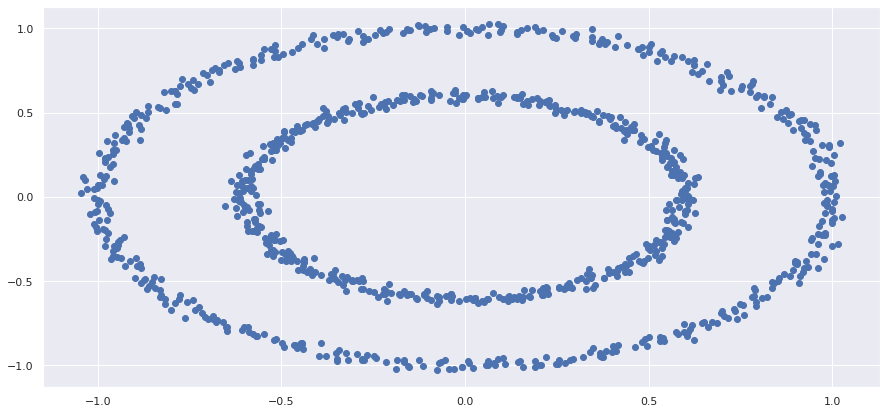

In [13]:
X_circles, y_circles = make_circles(n_samples=1000, noise=0.02, factor=0.6, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_circles[:,0], X_circles[:,1])
plt.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### 1.Apply all this algorithms to 3 datasets above, plot the results
### 2. Apply your implemented metrics on your predictions
### 3.Check if the better result by plot brings the better score
###### X_blobs, y_blobs
###### X_moons, y_moons 
###### X_circles, y_circles

In [15]:
# Models for each type of dataset
k_means = KMeans(n_clusters=3, copy_x=True, random_state=42)
k_means_moon = KMeans(n_clusters=2, copy_x=True, random_state=42)
k_means_circles = KMeans(n_clusters=2, copy_x=True, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
gm_moon = GaussianMixture(n_components=2, random_state=42)
gm_circles = GaussianMixture(n_components=2, random_state=42)

In [16]:
# KMeans prediction
k_means.fit(X_blobs)
k_means_moon.fit(X_moons)
k_means_circles.fit(X_circles)
pred = k_means.predict(X_blobs)
pred_moon = k_means_moon.predict(X_moons)
pred_circles = k_means_circles.predict(X_circles)

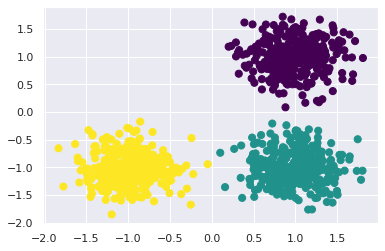

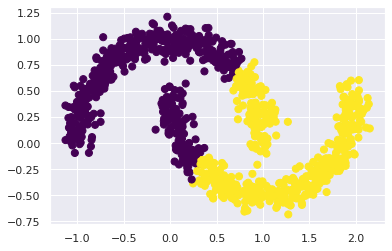

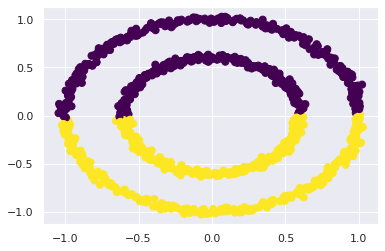

In [17]:
# KMeans plot
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=pred, s=50, cmap='viridis')
plt.show()
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=pred_moon, s=50, cmap='viridis')
plt.show()
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=pred_circles, s=50, cmap='viridis')
plt.show()

In [18]:
d_1 = {0:0, 1:2, 2:1}
tmp_1 = [d_1[i] for i in pred]
d_2 = {0:1, 1:0}
tmp_2 = [d_2[i] for i in pred_moon]
d_3 = {0:1, 1:0}
tmp_3 = [d_3[i] for i in pred_circles]

In [19]:
# KMeans metrics
print('F1 blobs: ', f1_bcubed(y_test=y_blobs, y_pred=tmp_1))
print('F1 moons: ', f1_bcubed(y_test=y_moons, y_pred=tmp_2))
print('F1 circles: ', f1_bcubed(y_test=y_circles, y_pred=tmp_3))

F1 blobs:  1.0
F1 moons:  0.248
F1 circles:  0.498


In [20]:
# GM predictions
gm.fit(X_blobs)
gm_moon.fit(X_moons)
gm_circles.fit(X_circles)
gm_pred = gm.predict(X_blobs)
gm_pred_moon = gm_moon.predict(X_moons)
gm_pred_circles = gm_circles.predict(X_circles)

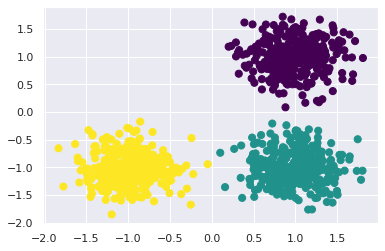

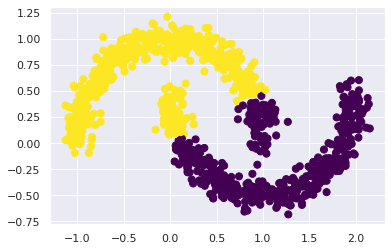

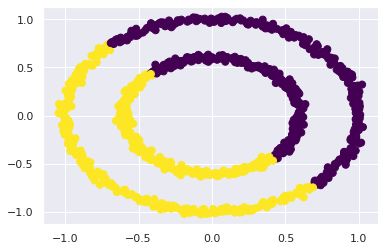

In [21]:
# GM plot
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=gm_pred, s=50, cmap='viridis')
plt.show()
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=gm_pred_moon, s=50, cmap='viridis')
plt.show()
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=gm_pred_circles, s=50, cmap='viridis')
plt.show()

In [22]:
d_1 = {0:0, 1:2, 2:1}
tmp_1 = [d_1[i] for i in gm_pred]
d_2 = {0:1, 1:0}
tmp_2 = [d_2[i] for i in gm_pred_moon]
d_3 = {0:1, 1:0}
tmp_3 = [d_3[i] for i in gm_pred_circles]

In [23]:
# GM metrics

print('F1 blobs: ', f1_bcubed(y_test=y_blobs, y_pred=tmp_1))
print('F1 moons: ', f1_bcubed(y_test=y_moons, y_pred=tmp_2))
print('F1 circles: ', f1_bcubed(y_test=y_circles, y_pred=tmp_3))

F1 blobs:  1.0
F1 moons:  0.859
F1 circles:  0.502
